In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [17]:
6.4*121.567+121.567

899.5958

In [18]:
7.6 # J0313-1906

7.6

In [19]:
ceph_data = pd.read_csv('C:\\Users\\shiy0\\OneDrive\\Dokumente\\Astrolab\\Task 10 Cosmology\\Cosmology_tab1.txt', delimiter=" ", decimal=",", usecols=[0, 3, 5], names=["date", "m_V", "d_m_V"], skiprows=1)
print(ceph_data)

            date    m_V d_m_V
0   2449049.0327  23.37  0.08
1   2449049.0938  23.49  0.10
2   2449057.4598  23.82  0.20
3   2449064.0828  23.83  0.13
4   2449064.1136  23.94  0.26
5   2449069.2661  23.69  0.20
6   2449069.3293  23.60  0.13
7   2449131.6589  23.23  0.17
8   2449131.7228  23.32  0.12
9   2449141.6263  23.58  0.11
10  2449141.6936  23.60  0.10
11  2449146.1096  23.74  0.10
12  2449146.1770  23.74  0.11
13  2449156.8860  23.90  0.13
14  2449156.9499  23.85  0.14
15  2449160.7658  23.60  0.13
16  2449160.8304  23.64  0.10
17  2449163.2450  23.48  0.10
18  2449163.3054  23.47  0.11
19  2449295.2633  23.77  0.15
20  2449295.3195  23.88  0.17
21  2449307.7036  23.10  0.12
22  2449307.7661  23.18  0.11
23  2449429.6016  23.58  0.16


In [20]:
# Fourier Series for fitting
from symfit import parameters, variables, sin, cos, Fit
def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

2449049.0327
{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}

Parameter Value        Standard Deviation
a0        2.362208e+01 6.726191e-02
a1        -1.170426e-01 nan
a2        -6.870176e-02 nan
a3        -1.112146e-02 nan
b1        4.575841e-02 nan
b2        -1.855945e-01 nan
b3        -6.620027e-02 nan
w         9.998300e-01 nan
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   41
Objective              <symfit.core.objectives.LeastSquares object at 0x000001421211D400>
Minimizer              <symfit.core.minimizers.BFGS object at 0x0000014216AF6ED0>

Goodness of fit qualifiers:
chi_squared            0.792260196000874
objective_value        0.396130098000437
r_squared              0.3734101581770992


c:\Users\shiy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\symfit\core\fit_results.py:116: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.variance(param))


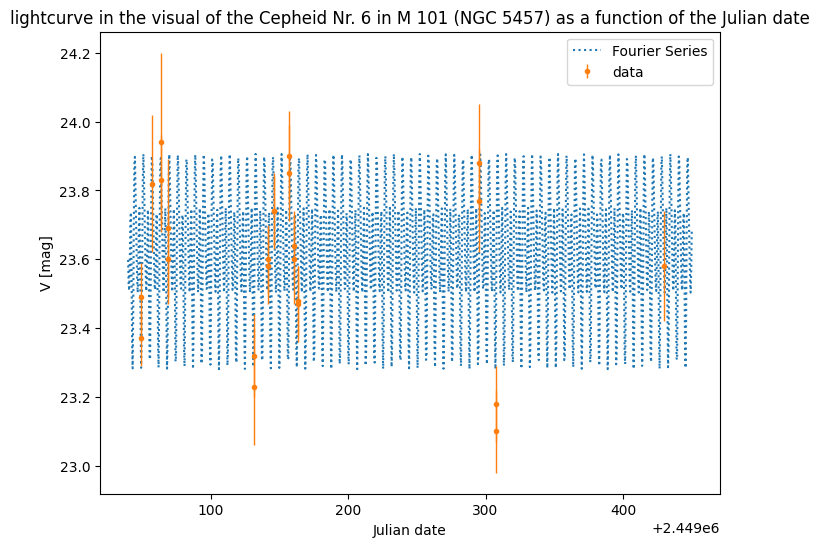

In [21]:
# Stelle sicher, dass die Spalte "date" numerisch ist
ceph_data["date"] = pd.to_numeric(ceph_data["date"], errors='coerce')
ceph_data["m_V"] =  pd.to_numeric(ceph_data["m_V"], errors='coerce')
ceph_data["d_m_V"] =  pd.to_numeric(ceph_data["d_m_V"], errors='coerce')
print(ceph_data["date"].values[0])

x, y = variables('x, y')
w, = parameters('w')     # Frequency parameter
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

xdata = ceph_data["date"].values
ydata = ceph_data["m_V"].values

# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.figure(figsize=(8,6))
x_range=np.linspace(40+2.449e6, 450+2.449e6, 1000)
plt.plot(x_range, fit.model(x=x_range, **fit_result.params).y, ls=':', label='Fourier Series')
plt.errorbar(ceph_data["date"], ceph_data["m_V"], ceph_data["d_m_V"], linewidth = 0, elinewidth = 1, marker='.', label='data')

plt.xlabel('Julian date')
plt.ylabel('V [mag]')
plt.title('lightcurve in the visual of the Cepheid Nr. 6 in M 101 (NGC 5457) as a function of the Julian date')
plt.legend()
plt.show()

In [22]:
w=9.998300e-01
P=2*np.pi/w
print('period P=', P, 'days')
M_V=-2.76*(np.log10(P)-1)-4.16  # V-Band
print(M_V)

m_V=np.mean(ydata)     # mean magnitude
DM=m_V-M_V   # distance modulus
print('distance modulus DM=', DM, '[mag]')

ratio=10**(0.4*(4.83-M_V))    # Luminosity ratio with sun
print('L/L_sun=', ratio)

period P= 6.284253630296737 days
-3.6031802249618026
distance modulus DM= 27.2031802249618 [mag]
L/L_sun= 2361.9575605661175


In [23]:
table2 = pd.read_csv('C:\\Users\\shiy0\\OneDrive\\Dokumente\\Astrolab\\Task 10 Cosmology\\Cosmology_tab2_modified.txt', delimiter=" ", decimal=",", usecols=[0, 4, 10, 13, 18, 23], names=["Galaxy", "N_Ceph", "DM", "Error", "v_Helio", "v_CMB"], skiprows=1)

print(table2)
table2["N_Ceph"] = pd.to_numeric(table2["N_Ceph"], errors='coerce')
DM = pd.to_numeric(table2["DM"], errors='coerce')
Error = pd.to_numeric(table2["Error"], errors='coerce')
v_Helio = pd.to_numeric(table2["v_Helio"], errors='coerce')
v_CMB = pd.to_numeric(table2["v_CMB"], errors='coerce')

      Galaxy  N_Ceph     DM Error  v_Helio  v_CMB
0   NGC300##      16  26.53  0.07      144    -57
1   NGC925##      73  29.80  0.04      553    398
2   NGC1326A      17  31.04  0.09     1836   1787
3   NGC1365#      52  31.18  0.05     1636   1597
4   NGC1425#      29  31.60  0.05     1512   1477
5   NGC2403#      10  27.48  0.10      131    216
6   NGC2541#      34  30.25  0.05      559    736
7   NGC2090#      34  30.29  0.08      931   1057
8   NGC3031#      25  27.75  0.08      -34     65
9   NGC3198#      42  30.68  0.08      662    890
10  NGC3351#      49  29.85  0.09      778   1117
11  NGC3368#      11  29.97  0.06      897   1236
12  NGC3621#      69  29.08  0.06      805   1152
13  NGC4321#      52  30.78  0.07     1571   1856
14  NGC4414#       9  31.10  0.05      716    959
15  NGC4496A      98  30.81  0.03     1730   2024
16  NGC4548#      24  30.88  0.05      486    763
17  NGC4535#      50  30.85  0.05     1961   2248
18  NGC4536#      39  30.80  0.04     1804   2097


In [24]:
dm=np.loadtxt('C:\\Users\\shiy0\\OneDrive\\Dokumente\\Astrolab\\Task 10 Cosmology\\Cosmology_tab2.txt', usecols=[3], skiprows=3)   # usecols: nimmt 3. Spalte
print(dm)

[26.53 29.8  31.04 31.18 31.6  27.48 30.25 30.29 27.75 30.68 29.85 29.97
 29.08 30.78 31.1  30.81 30.88 30.85 30.8  31.61 30.38 27.56 30.81 28.28]


Hubble constant H0= 78.72 +- 18.689477827715756 (km/s)/Mpc
time T0= 0.012703004965191719


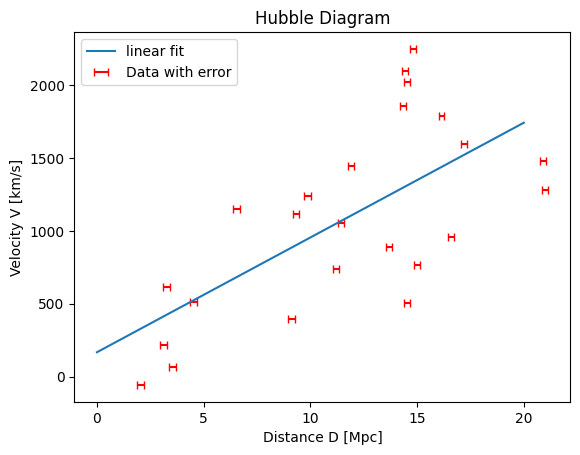

In [25]:
def linear(a,x,b):
    return a*x+b

D=10**(DM/5+1)/10**6     # luminous distance in Mpc
D_Error=10/5/(DM/5*np.log(10))
# print(D_Error)
popt, pcov=curve_fit(linear, D, v_CMB)
plt.errorbar(D, v_CMB, xerr=D_Error, fmt='None', ecolor='r', capsize=3, marker='s', ms='2', label='Data with error')
D_range=np.linspace(0, 20, 1000)
plt.plot(D_range, linear(D_range, *popt), label='linear fit')

print('Hubble constant H0=', popt[0].round(2), '+-', pcov[0][0]**0.5, '(km/s)/Mpc')
print('time T0=', 1/popt[0])

plt.xlabel('Distance D [Mpc]')
plt.ylabel('Velocity V [km/s]')
plt.title('Hubble Diagram')

plt.legend()
plt.show()

Type II supernovae originate from the core collapse of massive stars, and their luminosity varies significantly depending on the mass, structure, and environment of the progenitor star. This variability makes it difficult to use them as "standard candles" with a consistent intrinsic brightness, which is crucial for accurate distance measurements. Type II supernovae show complex light curves, especially during the plateau phase (Type IIP). These light curves do not have a clear, well-defined peak that can be directly correlated to their intrinsic brightness, unlike Type Ia supernovae, which show a much more uniform and predictable light curve. 

The spectra of Type I supernovae lack hydrogen lines. This absence is a defining feature of all Type I supernovae and indicates that the progenitor star had lost its hydrogen envelope before the explosion. The spectra of Type II supernovae contain strong hydrogen Balmer lines. These lines indicate the presence of a hydrogen-rich outer layer around the progenitor star at the time of the explosion.

K correction converts measurements of astronomical objects into their respective rest frames. The correction acts on that object's observed magnitude (or equivalently, its flux). Because astronomical observations often measure through a single filter or bandpass, observers only measure a fraction of the total spectrum, redshifted into the frame of the observer. For example, to compare measurements of stars at different redshifts viewed through a red filter, one must estimate K corrections to these measurements in order to make comparisons. 
$$ M=m-5(log_10 D_L -1) -K_{Korr})$$


In [26]:
with open("C:\\Users\\shiy0\\OneDrive\\Dokumente\\Astrolab\\Task 10 Cosmology\\Cosmology_tab3.txt", "r") as f:
    text = f.readlines()[3:]
text = [" ".join(i.split()) for i in text]
with open("C:\\Users\\shiy0\\OneDrive\\Dokumente\\Astrolab\\Task 10 Cosmology\\Cosmology_tab4.txt", "r") as f:
    new_text = f.readlines()[3:]
text += [" ".join(i.split()) for i in new_text]
with open("joined_34.txt", "w") as f:
    f.writelines(line + "\n" for line in text)


Hubble = pd.read_csv('C:\\Users\\shiy0\\OneDrive\\Dokumente\\Astrolab\\Task 10 Cosmology\\joined_34.txt', delimiter=" ", decimal=",", names=["SN", "z", "dz", "m (obs)(peak)", "dm (obs)(peak)", "A_E", "K(BB)", "Delta(corr)", "sigma B"], skiprows=3)
print(Hubble)

z =  pd.to_numeric(Hubble["z"], errors='coerce')
dz =  pd.to_numeric(Hubble["dz"], errors='coerce')
m_obs_peak =  pd.to_numeric(Hubble["m (obs)(peak)"], errors='coerce')
dm_obs_peak=  pd.to_numeric(Hubble["dm (obs)(peak)"], errors='coerce')
A_E=  pd.to_numeric(Hubble["A_E"], errors='coerce')
K_BB =  pd.to_numeric(Hubble["K(BB)"], errors='coerce')
Delta_corr=  pd.to_numeric(Hubble["Delta(corr)"], errors='coerce')
sigma_B=  pd.to_numeric(Hubble["sigma B"], errors='coerce')

        SN      z     dz m (obs)(peak) dm (obs)(peak)   A_E  K(BB)  \
0   1992ae  0.075  0.002         18.61           0.12  0.15   0.03   
1   1992ag  0.026  0.002         16.59           0.04  0.38  -0.01   
2   1992al  0.014  0.002         14.60           0.01  0.13  -0.01   
3   1992aq  0.101  0.002         19.29           0.12  0.05   0.05   
4   1992bc  0.020  0.002         15.20           0.01  0.07  -0.01   
5   1992bg  0.036  0.002         17.41           0.07  0.77   0.00   
6   1992bh  0.045  0.002         17.67           0.04  0.10   0.01   
7   1992bl  0.043  0.002         17.31           0.07  0.04   0.01   
8   1992bo  0.018  0.002         15.85           0.02  0.11  -0.01   
9   1992bp  0.079  0.002         18.55           0.02  0.21   0.04   
10  1992br  0.088  0.002         19.71           0.07  0.12   0.04   
11  1992bs  0.063  0.002         18.36           0.05  0.09   0.03   
12   1993B  0.071  0.002         18.68           0.08  0.31   0.03   
13   1993O  0.052  0

[0.075, 0.026, 0.014, 0.02, 0.036, 0.045, 0.043, 0.018, 0.079, 0.088, 0.063, 0.071, 0.052, 0.05]
Hubble constant H0= 58.54 +- 1.84 (km/s)/Mpc


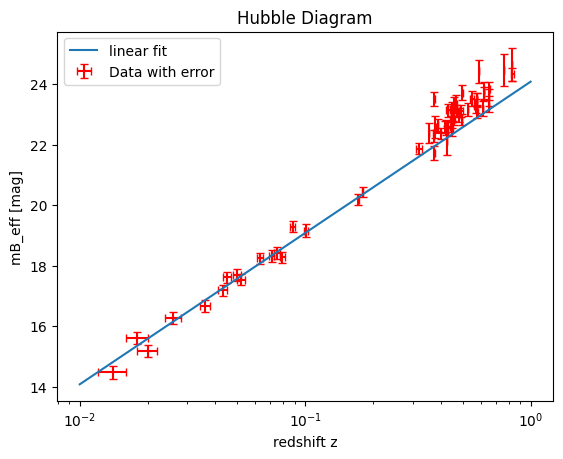

In [27]:
log_z=np.log10(z)
mB_eff=m_obs_peak+Delta_corr-K_BB-A_E

z_modified=[]
mB_eff_modified=[]
for i in range(len(z)):
    if z[i] >= 0.1:
        continue
    z_modified.append(z[i])
    mB_eff_modified.append(mB_eff[i])

print(z_modified)

def Hubble_law(z, H0):
    MB=-19.47
    c=3e5   # km/s
    M0=MB-5*np.log10(H0/c)+25   # calibration constant
    return M0+5*np.log10(z)

popt, pcov=curve_fit(Hubble_law, z_modified, mB_eff_modified)

plt.xscale('log')
plt.errorbar(z, mB_eff, xerr=dz, yerr=sigma_B, fmt='None', ecolor='r', capsize=3, marker='s', ms='2', label='Data with error')

z_range=np.linspace(0.01, 1, 100)
plt.plot(z_range, Hubble_law(z_range, *popt), label='linear fit')

fehler=pcov[0][0]**0.5

print('Hubble constant H0=', popt[0].round(2), '+-', fehler.round(2), '(km/s)/Mpc')

plt.xlabel('redshift z')
plt.ylabel('mB_eff [mag]')
plt.title('Hubble Diagram')

plt.legend()
plt.show()

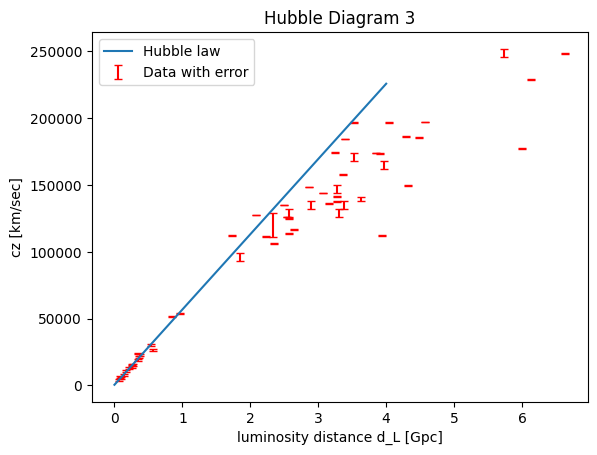

In [28]:
def luminosity_distance(x):
    return 10**((x-25)/5)   # unit Mpc d_L

MB=-19.47
difference=mB_eff-MB
d_L=luminosity_distance(difference)/10**3   # in Gpc
# print(d_L)
c=3e5
cz=c*z

d_L_modified=[]
cz_modified=[]
for i in range(len(d_L)):
    if d_L[i] >= 1:
        continue
    d_L_modified.append(d_L[i])
    cz_modified.append(cz[i])

popt, pcov=curve_fit(linear, d_L_modified, cz_modified)

plt.errorbar(d_L, c*z, yerr=c*dz, fmt='None', ecolor='r', capsize=3, marker='s', ms='2', label='Data with error')
d_L_range=np.linspace(0, 4, 100)
plt.plot(d_L_range, linear(d_L_range, *popt), label='Hubble law')

plt.xlabel('luminosity distance d_L [Gpc]')
plt.ylabel('cz [km/sec]')
plt.title('Hubble Diagram 3')

plt.legend()

Using SCDM Modell:
$$d_L(z;\Omega_M, H_0)=\frac{c}{H_0}\frac{1}{q_0^2}(q_0z+(q_0-1)(\sqrt{1+2q_0z}-1))$$
Taylor expansion: $\sqrt{1+2ax}\approx 1+ax$ for $z\ll1$
$$d_L(z;\Omega_M, H_0)\approx\frac{c}{H_0}\frac{1}{q_0^2}(q_0z+(q_0-1)(1+q_0z-1))=\frac{cz}{H_0}$$
which follows the Hubble law

1.7398498418530473e-05


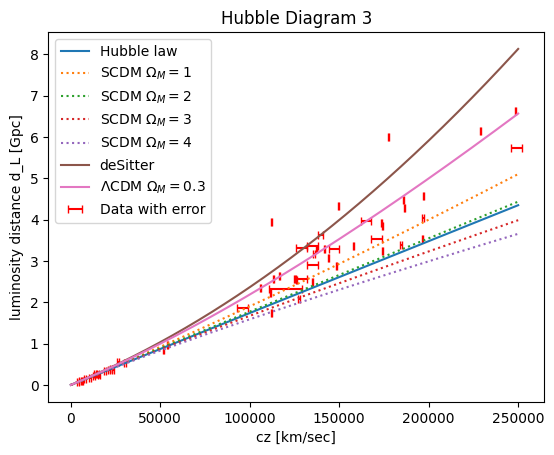

In [29]:
popt1, pcov1=curve_fit(linear, cz_modified, d_L_modified)

plt.errorbar(cz, d_L,  xerr=c*dz, fmt='None', ecolor='r', capsize=3, marker='s', ms='2', label='Data with error')
cz_range=np.linspace(0, 250000, 1000)
plt.plot(cz_range, linear(cz_range, *popt1), label='Hubble law')
print(popt1[0])    # H0=57.48 (km/s)/Mpc

# SCDM for O_l=0
def SCDM(O_M, cz):
    q0=O_M/2
    H0=popt[0]
    return c/H0/q0**2*(q0*cz/c+(q0-1)*(np.sqrt(1+2*q0*cz/c)-1))

plt.plot(cz_range, SCDM(1, cz_range), label='SCDM $\\Omega_M=1$', linestyle=':')
plt.plot(cz_range, SCDM(2, cz_range), label='SCDM $\\Omega_M=2$', linestyle=':')
plt.plot(cz_range, SCDM(3, cz_range), label='SCDM $\\Omega_M=3$', linestyle=':')
plt.plot(cz_range, SCDM(4, cz_range), label='SCDM $\\Omega_M=4$', linestyle=':')

# deSitter O_k=O_M=0, O_l=1
def deSitter(cz):
    return c/popt[0]*cz/c*(1+cz/c)
plt.plot(cz_range, deSitter(cz_range), label='deSitter')

# ΛCDM O_k=0
def eta(cz, O_M):
    s=((1-O_M)/O_M)**(1/3)
    return 2*np.sqrt(s**3+1)*((1+cz/c)**4-0.154*s*(1+cz/c)**3+0.4304*s**2*(1+cz/c)**2+0.19097*s**3*(1+cz/c)+0.066941*s**4)**(-1/8)
def UCDM(O_M, cz):
    return c/popt[0]*(1+cz/c)*(eta(0,O_M)-eta(cz, O_M))
plt.plot(cz_range, UCDM(0.3, cz_range), label='ΛCDM $\\Omega_M=0.3$')

plt.ylabel('luminosity distance d_L [Gpc]')
plt.xlabel('cz [km/sec]')
plt.title('Hubble Diagram 3')

plt.legend()

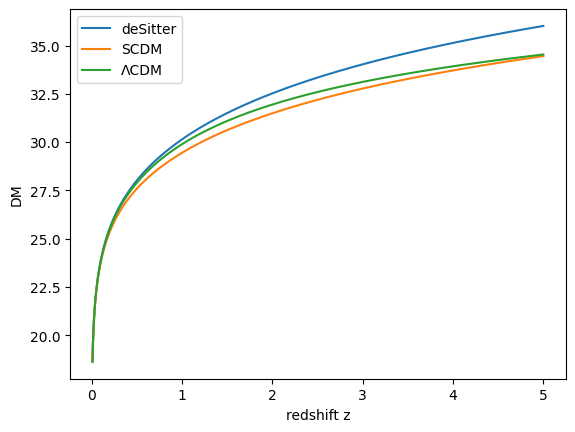

In [30]:
def d_L_to_distance_moduls(d_L):   # DM
    return 5*np.log10(d_L)+25

z_range=np.linspace(0.01, 5, 1000)
plt.errorbar(z_range, d_L_to_distance_moduls(deSitter(c*z_range)), label='deSitter')
plt.errorbar(z_range, d_L_to_distance_moduls(SCDM(0.1,c*z_range)), label='SCDM')
plt.errorbar(z_range, d_L_to_distance_moduls(UCDM(0.1,c*z_range)), label='ΛCDM')

plt.xlabel('redshift z')
plt.ylabel('DM')

plt.legend()
